In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df= pd.read_csv("data/task_fraud_rate.csv")

# Exploratory Data Analysis 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   networkGrowthFeature15          10800 non-null  float64
 1   timeBetweenOrdersFeature15      10800 non-null  int64  
 2   totalOrderValueFeature1         10800 non-null  float64
 3   skuPopularityFeature21          10800 non-null  float64
 4   maxOrderValueDeviationFeature   10800 non-null  float64
 5   latestOrderPriceFeature15       10800 non-null  float64
 6   totalOrderValueFeature25        10800 non-null  float64
 7   successfulOrderValueFeature32   10800 non-null  float64
 8   successfulOrderValueFeature47   10800 non-null  float64
 9   skuCountFeature25               10800 non-null  float64
 10  orderNumberFeature42            10800 non-null  float64
 11  skueValueFeature3               10800 non-null  float64
 12  marketCountry                   

In [4]:
df.describe()

,networkGrowthFeature15,timeBetweenOrdersFeature15,totalOrderValueFeature1,skuPopularityFeature21,maxOrderValueDeviationFeature,latestOrderPriceFeature15,totalOrderValueFeature25,successfulOrderValueFeature32,successfulOrderValueFeature47,skuCountFeature25,...,orderValueFeature73,accountAgeFeature12,lastestOrderValueFeature81,skuPopularityFeature35,orderPriceFeature28,orderPriceFeature37,accountAgeFeature24,anonymousFeature99,oldModelScore,newModelScore
count,10800.000000,1.080000e+04,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04,10800.000000,1.080000e+04,1.080000e+04,1.080000e+04,...,1.080000e+04,1.080000e+04,10800.000000,1.080000e+04,1.080000e+04,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000
mean,1108.418426,4.706893e+05,32.759487,-6.692592e+06,-2.870283e+04,-6.203567e+04,6.635615,-1.942171e+04,-1.944414e+04,-6.146703e+04,...,-7.638887e+05,4.706905e+05,1.635970,-6.692592e+06,-1.944286e+04,1.596993,4.706905e+05,-3.726851e+06,0.085002,0.088036
std,3221.630184,5.792127e+05,142.167742,4.705016e+06,5.350137e+05,7.852254e+05,47.298215,4.405510e+05,4.405500e+05,7.852711e+05,...,2.656316e+06,5.792124e+05,1.948460,4.705016e+06,4.405501e+05,1.579886,5.792124e+05,4.835417e+06,0.073905,0.097330
min,0.000152,0.000000e+00,0.000000,-9.999999e+06,-9.999999e+06,-9.999999e+06,0.000000,-9.999999e+06,-9.999999e+06,-9.999999e+06,...,-9.999999e+06,0.000000e+00,0.000000,-9.999999e+06,-9.999999e+06,0.000000,0.000000e+00,-9.999999e+06,0.000000,0.000000
25%,0.000708,7.000000e+00,1.365387,-9.999999e+06,-2.704832e-02,3.852316e-01,0.626963,1.234262e+00,8.482067e-06,2.000000e+01,...,3.544677e-06,8.000000e+00,0.479650,-9.999999e+06,6.547966e-01,0.664316,8.000000e+00,-9.999999e+06,0.043333,0.031629
50%,0.002640,1.863100e+05,3.578855,-9.999999e+06,4.615358e-01,8.589823e-01,1.529466,3.224471e+00,6.334010e-05,1.170000e+02,...,2.119345e-05,1.863105e+05,1.062500,-9.999999e+06,1.209201e+00,1.217274,1.863105e+05,1.000000e+00,0.080833,0.077864
75%,44.490358,8.123628e+05,10.502430,0.000000e+00,1.151578e+00,1.935198e+00,3.315451,8.876623e+00,1.526277e-01,5.930000e+02,...,8.037110e-03,8.123628e+05,2.303583,0.000000e+00,2.073138e+00,2.091920,8.123628e+05,1.000000e+00,0.120469,0.125241
max,14400.000000,2.162882e+06,2577.046753,1.216840e+00,1.999027e+01,3.705455e+01,1773.042105,2.342355e+03,3.735175e+01,7.792000e+03,...,1.156932e+01,2.162883e+06,45.693767,7.307627e-01,3.828401e+01,38.284007,2.162883e+06,1.000000e+00,0.658793,0.995500


In [5]:
# rounding all the columns to the 3rd decimal point
df = df.round({col: 3 for col in df.select_dtypes(include=['float64', 'float32']).columns})

### Visualising Target Variable

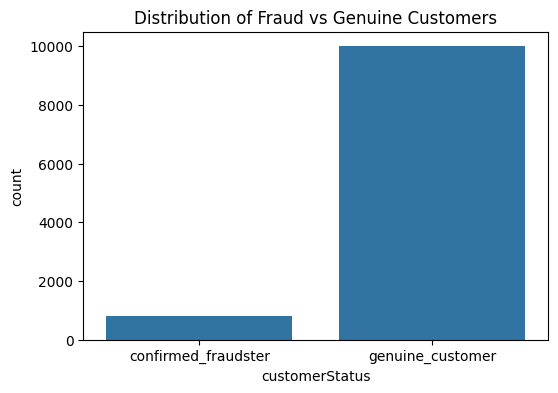

In [6]:

plt.figure(figsize=(6, 4))
sns.countplot(x=df["customerStatus"])
plt.title("Distribution of Fraud vs Genuine Customers")
plt.show()


### Dealing with Column Duplicates

In [7]:
# I noticed that there were some features name that looks similar, code below obtains all the duplicate columns. 
df_copy = df.copy()

#standardizing the column names
new_columns = [re.sub(r'feature.*', '', col.lower()) for col in df_copy.columns]

df_copy.columns = new_columns
column_counts = {}
for col in df_copy.columns:
    if col in column_counts:
        column_counts[col] += 1
    else:
        column_counts[col] = 1

duplicate_columns = {col: count for col, count in column_counts.items() if count > 1}

if duplicate_columns:
    print("Duplicate column names and their counts:", duplicate_columns)
else:
    print("No duplicate column names found.")

Duplicate column names and their counts: {'totalordervalue': 2, 'skupopularity': 3, 'maxordervaluedeviation': 2, 'successfulordervalue': 3, 'ordervalue': 2, 'accountage': 2, 'orderprice': 2}


In [8]:
def analyze_duplicate_features(df, columns):
    if len(columns) < 2:
        print("Please provide at least two columns to compare.")
        return

    print(f"--- Analysis of duplicate columns: {', '.join(columns)} ---\n")

    # 1. Checking the percentage of identical values for each column pair
    total_values = len(df)
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            identical_values = (df[columns[i]] == df[columns[j]]).sum()
            percentage_identical = (identical_values / total_values) * 100
            print(f"Percentage of identical values between {columns[i]} and {columns[j]}: {percentage_identical:.2f}%")
    
    print("\nStatistical Properties:\n")
    print(df[columns].describe())  # 2. Statistical properties

    # 3. Checking correlation between all column pairs
    correlation_matrix = df[columns].corr()
    print("\nCorrelation Matrix:\n")
    print(correlation_matrix)

    # 4. Checking null values in each column
    print("\nMissing Values:")
    for col in columns:
        missing_values = df[col].isna().sum()
        print(f"{col}: {missing_values} missing values")

    print("\n" + "-" * 50)

In [9]:
analyze_duplicate_features(df, ["totalOrderValueFeature1", "totalOrderValueFeature25"])

--- Analysis of duplicate columns: totalOrderValueFeature1, totalOrderValueFeature25 ---

Percentage of identical values between totalOrderValueFeature1 and totalOrderValueFeature25: 45.19%

Statistical Properties:

       totalOrderValueFeature1  totalOrderValueFeature25
count             10800.000000              10800.000000
mean                 32.759487                  6.635614
std                 142.167744                 47.298218
min                   0.000000                  0.000000
25%                   1.365500                  0.627000
50%                   3.579000                  1.529000
75%                  10.502250                  3.315500
max                2577.047000               1773.042000

Correlation Matrix:

                          totalOrderValueFeature1  totalOrderValueFeature25
totalOrderValueFeature1                  1.000000                  0.721364
totalOrderValueFeature25                 0.721364                  1.000000

Missing Values:
tota

I need to analyse these two duplicate columns more deeply because the percentage of identical values isnt significant enough to drop either one and plus there is significant difference in the statistical properties.

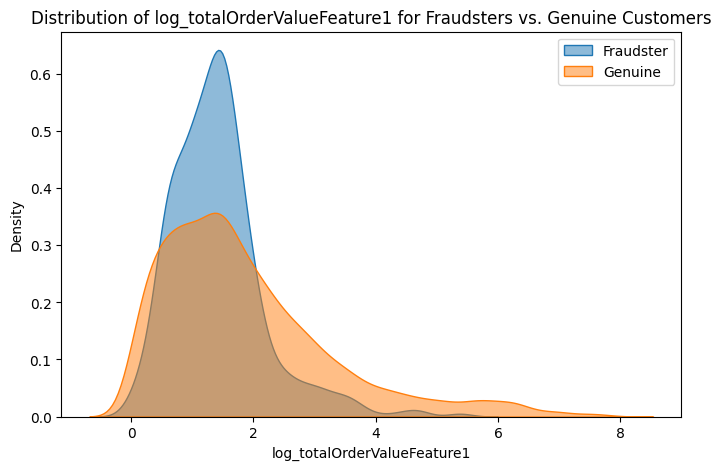

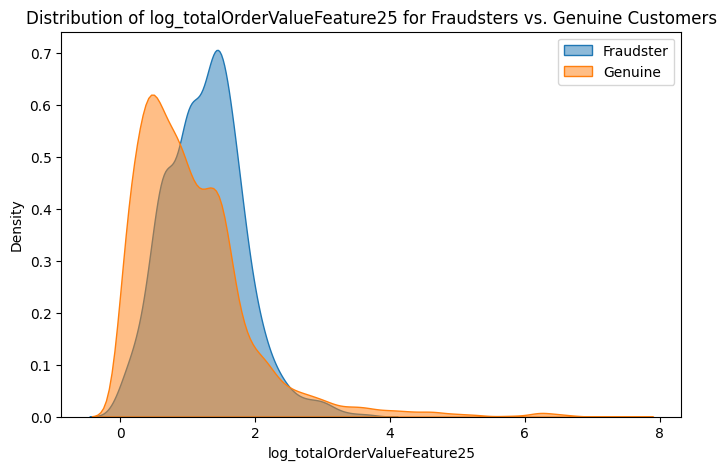

In [10]:
def plot_feature_distribution(df, columns, class_column):
    """
    Plots the distribution of duplicate features, separated by customer_status.
    
    Args:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list): The duplicate feature columns to analyze.
        class_column (str): The classification column (e.g., 'customer_status').

    Returns:
        None (Displays plots).
    """
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.kdeplot(df[df[class_column] == "confirmed_fraudster"][col], label="Fraudster", fill=True, alpha=0.5)
        sns.kdeplot(df[df[class_column] == "genuine_customer"][col], label="Genuine", fill=True, alpha=0.5)
        plt.title(f"Distribution of {col} for Fraudsters vs. Genuine Customers")
        plt.legend()
        plt.show()

# # Example usage:
df["log_totalOrderValueFeature1"] = np.log1p(df["totalOrderValueFeature1"])
df["log_totalOrderValueFeature25"] = np.log1p(df["totalOrderValueFeature25"])

plot_feature_distribution(df, ["log_totalOrderValueFeature1", "log_totalOrderValueFeature25"], "customerStatus")


In [11]:
analyze_duplicate_features(df, ["skuPopularityFeature21", "skuPopularityFeature24","skuPopularityFeature35"])

--- Analysis of duplicate columns: skuPopularityFeature21, skuPopularityFeature24, skuPopularityFeature35 ---

Percentage of identical values between skuPopularityFeature21 and skuPopularityFeature24: 66.94%
Percentage of identical values between skuPopularityFeature21 and skuPopularityFeature35: 91.37%
Percentage of identical values between skuPopularityFeature24 and skuPopularityFeature35: 66.94%

Statistical Properties:

       skuPopularityFeature21  skuPopularityFeature24  skuPopularityFeature35
count            1.080000e+04            1.080000e+04            1.080000e+04
mean            -6.692592e+06           -6.692592e+06           -6.692592e+06
std              4.705016e+06            4.705016e+06            4.705016e+06
min             -9.999999e+06           -9.999999e+06           -9.999999e+06
25%             -9.999999e+06           -9.999999e+06           -9.999999e+06
50%             -9.999999e+06           -9.999999e+06           -9.999999e+06
75%              0.000000e

We can drop either skuPopularityFeature21 or skuPopularityFeature35 because they nearly 90% similar.  however, futher analysis need to be done to compare it with the 3rd duplicate column. However, all three columns are highly correlated with each other. Hence, we just need to keep one. 

In [12]:
analyze_duplicate_features(df, ["maxOrderValueDeviationFeature", "maxOrderValueDeviation"])

--- Analysis of duplicate columns: maxOrderValueDeviationFeature, maxOrderValueDeviation ---

Percentage of identical values between maxOrderValueDeviationFeature and maxOrderValueDeviation: 60.29%

Statistical Properties:

       maxOrderValueDeviationFeature  maxOrderValueDeviation
count                   1.080000e+04            1.080000e+04
mean                   -2.870283e+04           -4.629586e+04
std                     5.350137e+05            6.788683e+05
min                    -9.999999e+06           -9.999999e+06
25%                    -2.700000e-02           -2.020000e-01
50%                     4.615000e-01            1.060000e-01
75%                     1.152000e+00            7.380000e-01
max                     1.999000e+01            1.999000e+01

Correlation Matrix:

                               maxOrderValueDeviationFeature  \
maxOrderValueDeviationFeature                       1.000000   
maxOrderValueDeviation                              0.786706   

            

In [13]:
analyze_duplicate_features(df, ["successfulOrderValueFeature32", "successfulOrderValueFeature47","successfulOrderValueFeature61"] ) 

--- Analysis of duplicate columns: successfulOrderValueFeature32, successfulOrderValueFeature47, successfulOrderValueFeature61 ---

Percentage of identical values between successfulOrderValueFeature32 and successfulOrderValueFeature47: 14.38%
Percentage of identical values between successfulOrderValueFeature32 and successfulOrderValueFeature61: 46.32%
Percentage of identical values between successfulOrderValueFeature47 and successfulOrderValueFeature61: 14.56%

Statistical Properties:

       successfulOrderValueFeature32  successfulOrderValueFeature47  \
count                   1.080000e+04                   1.080000e+04   
mean                   -1.942171e+04                  -1.944414e+04   
std                     4.405510e+05                   4.405500e+05   
min                    -9.999999e+06                  -9.999999e+06   
25%                     1.234500e+00                   0.000000e+00   
50%                     3.224500e+00                   0.000000e+00   
75%         

Even though the percentage of idendical values is less, the duplicate features are highly correlated so we can drop any two to avoid multicollinearity. 

In [14]:
analyze_duplicate_features(df, ["orderValueFeature56", "orderValueFeature73"])

--- Analysis of duplicate columns: orderValueFeature56, orderValueFeature73 ---

Percentage of identical values between orderValueFeature56 and orderValueFeature73: 0.01%

Statistical Properties:

       orderValueFeature56  orderValueFeature73
count         1.080000e+04         1.080000e+04
mean         -5.981896e+04        -7.638887e+05
std           7.854049e+05         2.656316e+06
min          -9.999999e+06        -9.999999e+06
25%           6.580000e+02         0.000000e+00
50%           1.420000e+03         0.000000e+00
75%           3.132000e+03         8.000000e-03
max           5.976200e+04         1.156900e+01

Correlation Matrix:

                     orderValueFeature56  orderValueFeature73
orderValueFeature56             1.000000            -0.018224
orderValueFeature73            -0.018224             1.000000

Missing Values:
orderValueFeature56: 0 missing values
orderValueFeature73: 0 missing values

--------------------------------------------------


In [15]:
analyze_duplicate_features(df, ["accountAgeFeature24", "accountAgeFeature12"])

--- Analysis of duplicate columns: accountAgeFeature24, accountAgeFeature12 ---

Percentage of identical values between accountAgeFeature24 and accountAgeFeature12: 100.00%

Statistical Properties:

       accountAgeFeature24  accountAgeFeature12
count         1.080000e+04         1.080000e+04
mean          4.706905e+05         4.706905e+05
std           5.792124e+05         5.792124e+05
min           0.000000e+00         0.000000e+00
25%           8.000000e+00         8.000000e+00
50%           1.863105e+05         1.863105e+05
75%           8.123628e+05         8.123628e+05
max           2.162883e+06         2.162883e+06

Correlation Matrix:

                     accountAgeFeature24  accountAgeFeature12
accountAgeFeature24                  1.0                  1.0
accountAgeFeature12                  1.0                  1.0

Missing Values:
accountAgeFeature24: 0 missing values
accountAgeFeature12: 0 missing values

--------------------------------------------------


Will be dropping either one of these columns

In [16]:
analyze_duplicate_features(df, ["orderPriceFeature28", "orderPriceFeature37"])

--- Analysis of duplicate columns: orderPriceFeature28, orderPriceFeature37 ---

Percentage of identical values between orderPriceFeature28 and orderPriceFeature37: 73.50%

Statistical Properties:

       orderPriceFeature28  orderPriceFeature37
count         1.080000e+04         10800.000000
mean         -1.944286e+04             1.596993
std           4.405501e+05             1.579886
min          -9.999999e+06             0.000000
25%           6.550000e-01             0.664000
50%           1.209000e+00             1.217000
75%           2.073500e+00             2.092000
max           3.828400e+01            38.284000

Correlation Matrix:

                     orderPriceFeature28  orderPriceFeature37
orderPriceFeature28             1.000000            -0.007028
orderPriceFeature37            -0.007028             1.000000

Missing Values:
orderPriceFeature28: 0 missing values
orderPriceFeature37: 0 missing values

--------------------------------------------------


In [17]:
columns_to_drop = [
    "accountAgeFeature24",
    "successfulOrderValueFeature32",
    "successfulOrderValueFeature47",
    "orderPriceFeature28",
    "skuPopularityFeature21",
    "skuPopularityFeature24"
]

# Drop the specified columns if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

### Dealing with Categorical Data

In [18]:
# understanding the unique value counts for categorical data
categorical_cols = df.select_dtypes(include=['object']).columns 
numerical_cols = df.select_dtypes(include=['number']).columns  

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].nunique(), "unique values")
    print(df[col].value_counts().head(10)) 



Column: marketCountry
135 unique values
marketCountry
MARKET_ID10    1368
MARKET_ID4     1256
MARKET_ID5     1115
MARKET_ID13     967
MARKET_ID0      867
MARKET_ID12     548
MARKET_ID6      371
MARKET_ID2      314
MARKET_ID41     195
MARKET_ID7      174
Name: count, dtype: int64

Column: isEWallet
2 unique values
isEWallet
-9999999     10201
googlepay      599
Name: count, dtype: int64

Column: customerId
9869 unique values
customerId
CUSTOMER_ID1106    30
CUSTOMER_ID1187    19
CUSTOMER_ID714     18
CUSTOMER_ID1145    14
CUSTOMER_ID1579    12
CUSTOMER_ID496     10
CUSTOMER_ID878     10
CUSTOMER_ID811      9
CUSTOMER_ID3470     9
CUSTOMER_ID1089     8
Name: count, dtype: int64

Column: orderTime
10800 unique values
orderTime
2021-11-03 14:41:35.323000+00:00    1
2021-09-15 21:09:10.669000+00:00    1
2021-09-03 11:26:59.080000+00:00    1
2021-09-16 21:41:28.993000+00:00    1
2021-08-31 00:08:34.672000+00:00    1
2021-11-05 11:43:48.559000+00:00    1
2021-09-25 16:19:34.859000+00:00    1

## Network Related Features

In [19]:
network_df = df[["networkGrowthFeature15","networkGeneralSizeFeature25","networLocalGrowthFeature35","networkLocalSizeFeature40","customerStatus"]]
network_df

,networkGrowthFeature15,networkGeneralSizeFeature25,networLocalGrowthFeature35,networkLocalSizeFeature40,customerStatus
0,41.221,2.046670e+02,41.221,2.046670e+02,confirmed_fraudster
1,0.005,2.607925e+06,0.005,2.607925e+06,confirmed_fraudster
2,69.231,1.506670e+02,69.231,1.506670e+02,confirmed_fraudster
3,106.931,3.366700e+01,106.931,3.366700e+01,confirmed_fraudster
4,10800.000,0.000000e+00,10800.000,0.000000e+00,confirmed_fraudster
...,...,...,...,...,...
10795,0.001,2.066689e+07,0.001,2.066689e+07,genuine_customer
10796,10800.000,0.000000e+00,10800.000,0.000000e+00,genuine_customer
10797,202.817,1.775000e+01,202.817,1.775000e+01,genuine_customer
10798,7200.000,0.000000e+00,7200.000,0.000000e+00,genuine_customer


In [20]:
analyze_duplicate_features(df, ["networkGrowthFeature15","networkGeneralSizeFeature25","networLocalGrowthFeature35","networkLocalSizeFeature40"])

--- Analysis of duplicate columns: networkGrowthFeature15, networkGeneralSizeFeature25, networLocalGrowthFeature35, networkLocalSizeFeature40 ---

Percentage of identical values between networkGrowthFeature15 and networkGeneralSizeFeature25: 0.05%
Percentage of identical values between networkGrowthFeature15 and networLocalGrowthFeature35: 91.68%
Percentage of identical values between networkGrowthFeature15 and networkLocalSizeFeature40: 0.05%
Percentage of identical values between networkGeneralSizeFeature25 and networLocalGrowthFeature35: 0.05%
Percentage of identical values between networkGeneralSizeFeature25 and networkLocalSizeFeature40: 83.17%
Percentage of identical values between networLocalGrowthFeature35 and networkLocalSizeFeature40: 0.05%

Statistical Properties:

       networkGrowthFeature15  networkGeneralSizeFeature25  \
count            10800.000000                 1.080000e+04   
mean              1108.418427                 1.409589e+07   
std               3221.6301

Analysing the network related features, we found that the percentage of identical values and correlation for two sets of two different sets of features is very high. Hence, we drop two of them to avoid redundancy. 

In [21]:
network_df = df[["networkGrowthFeature15","networkGeneralSizeFeature25","customerStatus"]]
network_df

,networkGrowthFeature15,networkGeneralSizeFeature25,customerStatus
0,41.221,2.046670e+02,confirmed_fraudster
1,0.005,2.607925e+06,confirmed_fraudster
2,69.231,1.506670e+02,confirmed_fraudster
3,106.931,3.366700e+01,confirmed_fraudster
4,10800.000,0.000000e+00,confirmed_fraudster
...,...,...,...
10795,0.001,2.066689e+07,genuine_customer
10796,10800.000,0.000000e+00,genuine_customer
10797,202.817,1.775000e+01,genuine_customer
10798,7200.000,0.000000e+00,genuine_customer


C:\Users\evely\AppData\Local\Temp\ipykernel_32584\2243512183.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["customerStatus"] == "confirmed_fraudster"]["networkGrowthFeature15"], label="Fraudster", shade=True, color="red")
C:\Users\evely\AppData\Local\Temp\ipykernel_32584\2243512183.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["customerStatus"] == "genuine_customer"]["networkGrowthFeature15"], label="Genuine", shade=True, color="blue")
C:\Users\evely\AppData\Local\Temp\ipykernel_32584\2243512183.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["customerStatus"] == "confirmed_fraudster"

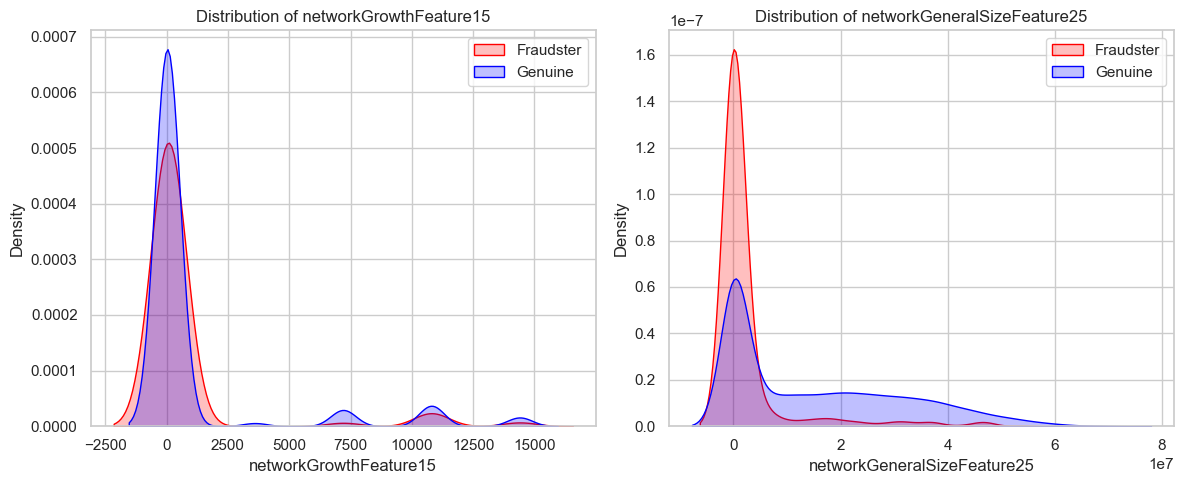

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (assuming it's already loaded as df)
# Set style
sns.set(style="whitegrid")

# Plot distribution of networkGrowthFeature15
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(df[df["customerStatus"] == "confirmed_fraudster"]["networkGrowthFeature15"], label="Fraudster", shade=True, color="red")
sns.kdeplot(df[df["customerStatus"] == "genuine_customer"]["networkGrowthFeature15"], label="Genuine", shade=True, color="blue")
plt.title("Distribution of networkGrowthFeature15")
plt.legend()

# Plot distribution of networkGeneralSizeFeature25
plt.subplot(1, 2, 2)
sns.kdeplot(df[df["customerStatus"] == "confirmed_fraudster"]["networkGeneralSizeFeature25"], label="Fraudster", shade=True, color="red")
sns.kdeplot(df[df["customerStatus"] == "genuine_customer"]["networkGeneralSizeFeature25"], label="Genuine", shade=True, color="blue")
plt.title("Distribution of networkGeneralSizeFeature25")
plt.legend()

plt.tight_layout()
plt.show()


## Time Related Features